<a href="https://colab.research.google.com/github/Choiyh1116/AI_capstone/blob/CHOI/Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 

In [1]:
!pip install imagehash

from skimage.metrics import structural_similarity as ssim #method to compare image 
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np #calculate 
import cv2 # to Image loaded
import os, sys # to drive mount for Colab
from google.colab.patches import cv2_imshow # to show image for Colab
from PIL import Image
import imagehash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 4.1 MB/s 


# 함수

In [60]:
#driveMount("/content/drive/MyDrive/video")
def driveMount(path):
  from google.colab import drive
  drive.mount('/content/drive')
  os.chdir(path)

#MSE(Mean Square Error)
def mse(x,y): return np.sqrt(((x-y)**2).sum())/(x.shape[0])

#video convert image list
def video_to_image(vidName)->list:
  video = cv2.VideoCapture(vidName) #'' 사이에 사용할 비디오 파일의 경로 및 이름을 넣어주도록 함
  
  if not video.isOpened():
    print("Could not Open :", vidName) ; exit(0)
  width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
  length = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) ; fps = video.get(cv2.CAP_PROP_FPS) ; count = 0 ; Video_list = [] ; threshold = 5 # 아무거나 일단
  min, sec = minSec(int(length/round(fps))) ; count = 0
  print("width :",width) ; print("height :",height)
  print("min :", min) ; print("sec :",sec) ; print("fps :", fps)
  
  while(video.isOpened()):
    ret,image = video.read()
    if ret:
        if(int(video.get(1)) % round(fps) == 0):
            if(count != 0):
                image = cv2_to_Image(image)
                hash = imagehash.dhash(image)
                otherhash = temp
                Video_list.append(hash-otherhash)
                temp = hash
            else :
                count += 1
                image = cv2_to_Image(image)
                temp = imagehash.dhash(image)
          
    else :
        break

  video.release()
  return width,height,Video_list

#divide time to min , sec
def minSec(time) : 
  min = int(time // 60) ; sec = time%60
  return min, sec

def cv2_to_Image(img: np.ndarray) -> Image:
    # return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return Image.fromarray(img)


def image_to_cv2(img: Image) -> np.ndarray:
    # return cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)
    return np.asarray(img)

def show_images(Video_list):
    for i, img in enumerate(Video_list):
        plt.subplot(131+i)
        plt.imshow(img/255.0)

def calculate_scores(Video_list, ssim=False):
    org =Video_list[0]
    
    for i, img in enumerate(Video_list,start = 1):
        min, sec = minSec(i)
        mse_score = mse(org.flatten(), img.flatten())
        if ssim: 
            ssim_score = ssim(org, img, multichannel=True)
            label = "min {} sec {}; MSE: {:.4f}, SSIM: {:.4f}"
            
            print(label.format(min, sec, mse_score, ssim_score ))
            
        else:
            label = "min {} sec {}; MSE: {:.4f}"
            print(label.format(min, sec, mse_score))
        org = img

#Average Hash
def average_hash(img):
    img = cv2_to_Image(img)
    img = img.convert("L") 
    img = img.resize((256,256), Image.ANTIALIAS) 
    pixel_data = img.getdata() 
    pixels = np.array(pixel_data) 
    pixels = pixels.reshape((256, 256)) 
    avg = pixels.mean() 
    diff = 1 * (pixels > avg) 
    return diff

# 이진 해시로 변환
def np2hash(ahash):
    bhash = []
    for nl in ahash.tolist():
        sl = [str(i) for i in nl]
        s2 = "".join(sl)
        i = int(s2, 2) # 이진수를 정수로 변환하기
        bhash.append("%04x" % i)
    return "".join(bhash)

#해밍 거리 계산
def hamming_dist(a, b):
    aa = a.reshape(1, -1) # 1차원 배열로 변환하기
    ab = b.reshape(1, -1)
    dist = (aa != ab).sum()
    return dist

def image_Processing(img):
  image_w = 64 ; image_h = 64
  img = img.convert("RGB")
  img = img.reshape(-1,image_w,image_h,1).astype('float32') / 255.
  return img

# Main

In [92]:
driveMount("/content/drive/MyDrive/video")
width,height,Video_list = video_to_image("11.mp4")

 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
width : 1280
height : 720
min : 60
sec : 45
fps : 10.0


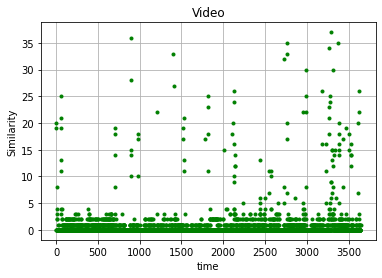

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

y = Video_list
x = list(range(len(y)))
data = list(zip(x,y))

#linkage_data = linkage(data, method='average', metric='euclidean')
#dendrogram(linkage_data)
plt.plot(x,y,color='green',linestyle='',marker='.')
plt.grid()
plt.xlabel('time')
plt.ylabel('Similarity')
plt.title("Video")

plt.show()

In [56]:
print(y.index(223) )

528


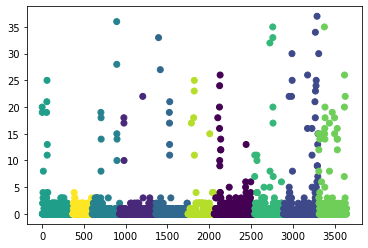

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

hierarchical_cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

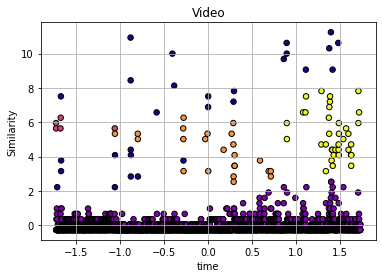

In [176]:

 # coding: utf-8

from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt



scaler = StandardScaler()

scaler.fit(data)


X_scaled = scaler.transform(data)



dbscan = DBSCAN(eps=0.625)

clusters = dbscan.fit_predict(X_scaled)



plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='plasma', s=30, edgecolors='black')

plt.grid()
plt.xlabel('time')
plt.ylabel('Similarity')
plt.title("Video")

plt.show()

# TEST

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [7]:
from keras.models import Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPool2D, Activation, Flatten, Dense, Dropout

input_layer = tf.keras.layers.Input(
    shape=(1078, 1728, 3), name='input_layer'
)

conv_layer = tf.keras.layers.Conv2D(
    filters=32, kernel_size=(3, 3), activation='relu', name='conv_layer'
)(input_layer)

pool_layer = tf.keras.layers.MaxPool2D(
    pool_size=(3, 3), name='pool_layer'
)(conv_layer)

output_layer = tf.keras.layers.Dense(
    units=2, activation='softmax', name='output_layer'
)(pool_layer)

model = tf.keras.models.Model(input_layer, output_layer)

model.compile(optimizer='rmsprop', loss=['mse','categorical_crossentropy', 'binary_crossentropy'])

In [8]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

batch_size = 32
epoch = 200
learning_rate = 1e-3
decay = learning_rate / epoch

optimizer = Adam(
    learning_rate=learning_rate,
    decay=decay
)

loss = CategoricalCrossentropy(from_logits=False)

model.compile(
    loss=loss,
    optimizer=optimizer,
	metrics=['accuracy']
)

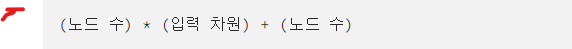

y = w * x + b

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [13]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [15]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=100,callbacks=[checkpoint,early])

NameError: ignored